In [721]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_absolute_error

import pandas as pd
import numpy as np

## Carregar os dados

In [722]:
df = pd.read_pickle("..//datasets/processed/laptop_price.pkl")
df.head()

,company,typename,inches,screen_resolution,cpu_manufacturer,cpu_frequency,gpu_manufacturer,ram_gb,memory_0_gb,memory_0_type,memory_1_gb,memory_1_type,opsys,weight_kg,price_euros
0,Apple,Ultrabook,13.3,2560x1600,Intel,2.3,Intel,8,128,ssd,0,0,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel,1.8,Intel,8,128,flash storage,0,0,macOS,1.34,898.94
2,HP,Notebook,15.6,1920x1080,Intel,2.5,Intel,8,256,ssd,0,0,Outros,1.86,575.00
3,Apple,Ultrabook,15.4,2880x1800,Intel,2.7,AMD,16,512,ssd,0,0,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,2560x1600,Intel,3.1,Intel,8,256,ssd,0,0,macOS,1.37,1803.60


In [723]:
features = df.drop(columns='price_euros')
for item in ['company', 'typename', 'screen_resolution', 'cpu_manufacturer', 'gpu_manufacturer', 'memory_0_type', 'memory_1_type', 'opsys']:
    features[item] = LabelEncoder().fit_transform(features[item])
target = df.price_euros

train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.3)

In [725]:
models = {
    'Random Forest Regressor': RandomForestRegressor(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Linear Regression': LinearRegression()
}

for name, model_ in models.items():
    model = model_
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    print(f'Algorithm: {name}',)
    print(f'R2 score: {r2_score(test_y,pred_y):.02f}',)
    print('Mean Absolute Error:', mean_absolute_error(test_y,pred_y))
    print('********************************************************')

Algorithm: Random Forest Regressor
R2 score: 0.82
Mean Absolute Error: 193.54309044726585
********************************************************
Algorithm: KNeighbors Regressor
R2 score: 0.68
Mean Absolute Error: 249.95386700767264
********************************************************
Algorithm: Decision Tree Regressor
R2 score: 0.69
Mean Absolute Error: 242.48589514066495
********************************************************
Algorithm: Linear Regression
R2 score: 0.67
Mean Absolute Error: 275.26580108264704
********************************************************


## Random Forest Regression

In [726]:
model = RandomForestRegressor(bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)
print(f'R2 score: {r2_score(test_y,pred_y):.02f}',)
print('Mean Absolute Error:', mean_absolute_error(test_y,pred_y))

R2 score: 0.80
Mean Absolute Error: 200.95658639108356


In [727]:
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# grid = GridSearchCV(RandomForestRegressor(), param_grid)
# grid.fit(train_x, train_y)
# grid.best_params_

## KNeighbors Regression

In [728]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)
print(f'R2 score: {r2_score(test_y,pred_y):.02f}',)
print('Mean Absolute Error:', mean_absolute_error(test_y,pred_y))

R2 score: 0.68
Mean Absolute Error: 253.52694799658994


In [729]:
# param_grid = dict(n_neighbors=np.arange(1, 100))
# grid = GridSearchCV(KNeighborsRegressor(), param_grid)
# grid.fit(train_x, train_y)
# grid.best_params_

## Decision Tree Regression

In [730]:
model = DecisionTreeRegressor(max_depth= 12, max_features= 'sqrt', max_leaf_nodes= 90, min_samples_leaf= 1, splitter= 'best')
model.fit(train_x, train_y)
pred_y = model.predict(test_x)
print(f'R2 score: {r2_score(test_y,pred_y):.02f}',)
print('Mean Absolute Error:', mean_absolute_error(test_y,pred_y))

R2 score: 0.71
Mean Absolute Error: 258.53713820236214


In [731]:
# param_grid={"splitter":["best","random"],
#            "max_depth" : [1,3,5,7,9,11,12],
#            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
#            "max_features":["log2","sqrt"],
#            "max_leaf_nodes":[10,20,30,40,50,60,70,80,90]
# }

# grid = GridSearchCV(DecisionTreeRegressor(), param_grid)
# grid.fit(train_x, train_y)
# grid.best_params_

## Linear Regression

In [732]:
model = LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, positive=False)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)
print(f'R2 score: {r2_score(test_y,pred_y):.02f}',)
print('Mean Absolute Error:', mean_absolute_error(test_y,pred_y))

R2 score: 0.67
Mean Absolute Error: 274.93784437438467


In [733]:
# param_grid = {
#     'copy_X': [True, False],
#     'fit_intercept': [True, False],
#     'n_jobs': np.arange(1, 100),
#     'positive': [True, False]
# }

# grid = GridSearchCV(LinearRegression(), param_grid)
# grid.fit(train_x, train_y)
# grid.best_params_

In [735]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [744]:
def experiment(model, features, target, n_splits=5):
    kf = KFold(n_splits=n_splits)

    scores = dict(
        train_count = list(),
        train_true_percent = list(),
        train_scores = list(),
        valid_count = list(),
        valid_true_percent = list(),
        valid_scores = list()
    )
    

    for train_index, valid_index in kf.split(features):
        train_x, train_y = features.iloc[train_index], target.iloc[train_index]
        valid_x, valid_y = features.iloc[valid_index], target.iloc[valid_index]
        
        model.fit(train_x, train_y)

        fold_train_score = r2_score(train_y, model.predict(train_x))
        fold_valid_score = r2_score(valid_y, model.predict(valid_x))

        scores['train_count'].append(train_x.shape[0])
        scores['valid_count'].append(valid_x.shape[0])
        scores['train_true_percent'].append(train_y.sum() / train_y.shape[0])
        scores['valid_true_percent'].append(valid_y.sum() / valid_y.shape[0])

        scores['train_scores'].append(fold_train_score)
        scores['valid_scores'].append(fold_valid_score)
    
    return pd.DataFrame(scores)

def plot_validation_curve(results, title, ax):
    x = np.arange(results.shape[0])

    ax.plot(x, results.train_scores, 'o-', label='Training Score')
    ax.plot(x, results.valid_scores, 'o-', label='Validation Score')

    ax.set_title(title)
    ax.set_ylim(.65, 1)
    ax.legend()
    ax.grid()

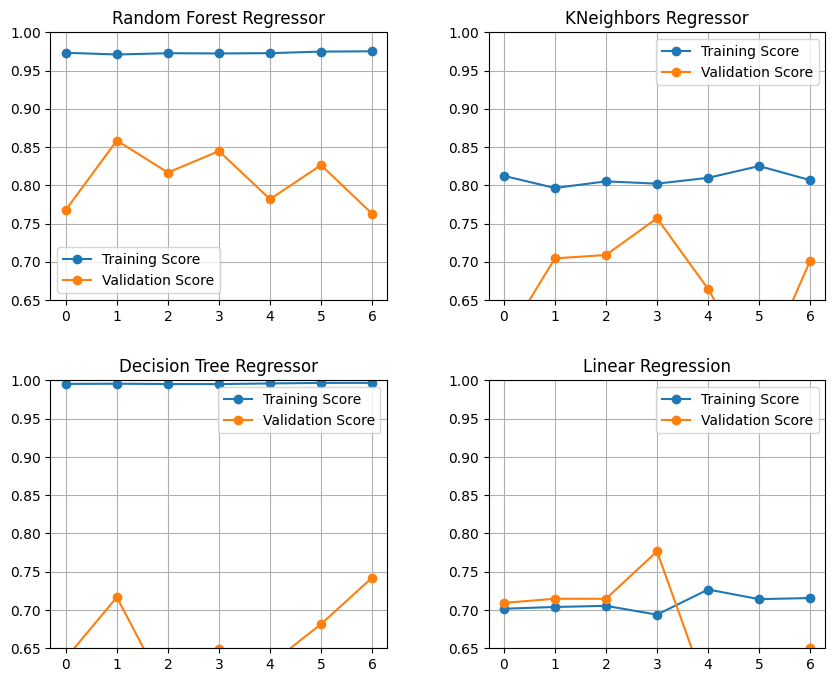

In [745]:
models = {
    'Random Forest Regressor': RandomForestRegressor(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Linear Regression': LinearRegression()
}

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

model_results = list()
for ax, (model_name, model) in zip([ax1, ax2, ax3, ax4], models.items()):
    results = experiment(model, features, target, n_splits=7)
    results['model'] = model_name
    model_results.append(results)

    plot_validation_curve(results, model_name, ax)
model_results = pd.concat(model_results, axis=0)

plt.subplots_adjust(wspace=.3, hspace=.3)
plt.show()

In [746]:
model_results.groupby('model', as_index=False).agg({
    'train_scores': ['mean', 'std', 'min', 'max'],
    'valid_scores': ['mean', 'std', 'min', 'max']
}).round(3)

model train_scores                      valid_scores  \
                                   mean    std    min    max         mean   
0  Decision Tree Regressor        0.996  0.001  0.995  0.997        0.664   
1     KNeighbors Regressor        0.808  0.009  0.797  0.825        0.669   
2        Linear Regression        0.709  0.011  0.694  0.727        0.684   
3  Random Forest Regressor        0.973  0.001  0.971  0.975        0.808   

                        
     std    min    max  
0  0.053  0.589  0.742  
1  0.073  0.549  0.757  
2  0.063  0.590  0.777  
3  0.038  0.763  0.859

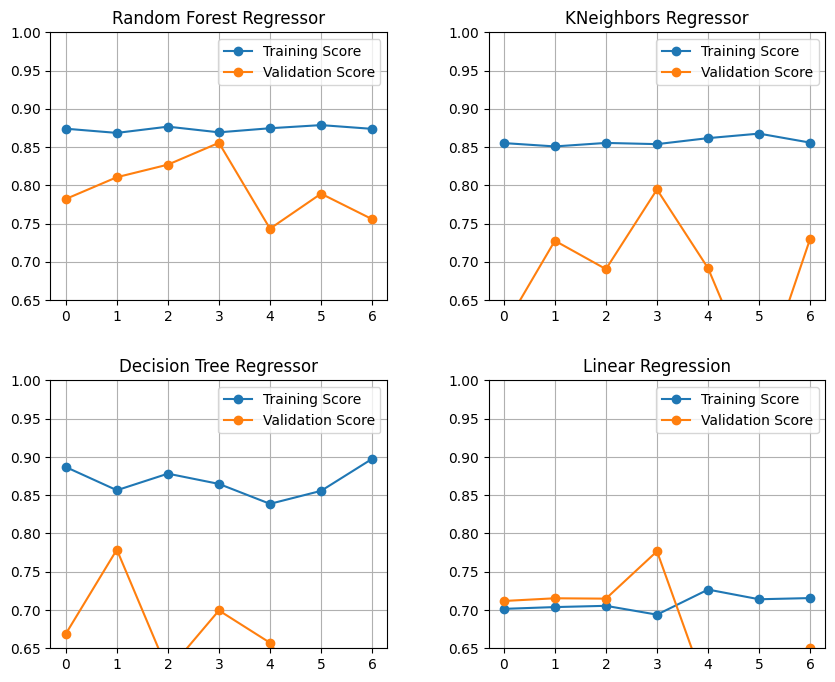

In [747]:
models = {
    'Random Forest Regressor': RandomForestRegressor(bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100),
    'KNeighbors Regressor': KNeighborsRegressor(n_neighbors=3),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth= 12, max_features= 'sqrt', max_leaf_nodes= 90, min_samples_leaf= 1, splitter= 'best'),
    'Linear Regression': LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, positive=False)
}

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

model_results = list()
for ax, (model_name, model) in zip([ax1, ax2, ax3, ax4], models.items()):
    results = experiment(model, features, target, n_splits=7)
    results['model'] = model_name
    model_results.append(results)

    plot_validation_curve(results, model_name, ax)
model_results = pd.concat(model_results, axis=0)

plt.subplots_adjust(wspace=.3, hspace=.3)
plt.show()

In [748]:
model_results.groupby('model', as_index=False).agg({
    'train_scores': ['mean', 'std', 'min', 'max'],
    'valid_scores': ['mean', 'std', 'min', 'max']
}).round(3)

model train_scores                      valid_scores  \
                                   mean    std    min    max         mean   
0  Decision Tree Regressor        0.868  0.020  0.839  0.898        0.653   
1     KNeighbors Regressor        0.857  0.006  0.851  0.868        0.683   
2        Linear Regression        0.709  0.011  0.694  0.727        0.685   
3  Random Forest Regressor        0.874  0.004  0.868  0.879        0.795   

                        
     std    min    max  
0  0.073  0.558  0.779  
1  0.086  0.533  0.795  
2  0.063  0.590  0.777  
3  0.039  0.743  0.856